In [54]:
#Assignment 4 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iphone7 = pd.read_csv("IS590IN-HW4-Iphone7-11012017.csv")
m400 = pd.read_csv("IS590IN-HW4-M400-11012017.csv")

In [3]:
iphone7.head()

,Time,bpm,mph,pace,Cadence,stride,distance-feet
0,0:00:00,0,0.0,0:00,0,0,0.00
1,0:00:01,0,1.0,62:02:00,53,34,4.54
2,0:00:02,0,1.7,36:08:00,52,33,7.87
3,0:00:03,0,1.8,32:48:00,49,33,11.80
4,0:00:04,0,2.1,29:05:00,50,26,15.43


In [4]:
m400.head()

,Timestamp,accelX,accelY,accelZ,gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),Roll(rads),Pitch(rads),Yaw(rads),...,ActivityType,ActivityConfidence,Pressure(kilopascals),RelativeAltitude(meters),magX(µT),magY(µT),magZ(µT),calMagX,calMagY,calMagZ
0,01-Nov-2017 17:29:07.081,-0.0185,-0.2017,-0.9492,-0.1521,-0.1844,0.2443,0.0000,0.0000,0.0000,...,Unknown,High,0.0000,0.0000,-18.6769,-41.9211,-579.1357,0.0000,0.0000,0.0000
1,01-Nov-2017 17:29:08.085,-0.0661,-0.3058,-0.9383,0.7627,0.2692,-0.4462,-0.1245,0.2486,2.8711,...,Unknown,High,98.5490,0.0000,-24.2196,-43.3198,-576.4908,-19.7402,-17.8539,-27.1616
2,01-Nov-2017 17:29:09.087,-0.0894,-0.2014,-1.0071,-0.1275,-0.7089,0.5079,-0.0652,0.1290,2.9894,...,Unknown,High,98.5505,-0.1268,-23.9304,-37.3968,-579.6495,-18.7898,-12.4321,-30.2734
3,01-Nov-2017 17:29:10.261,-0.4954,-0.0500,-0.7231,2.2281,-2.6135,-1.1568,-0.0652,0.1290,2.9894,...,Unknown,High,98.5520,-0.2537,-42.5604,-10.5387,-556.2697,-18.7898,-12.4321,-30.2734
4,01-Nov-2017 17:29:11.118,-1.7080,0.3526,-0.2104,-1.7126,-3.0282,0.6524,-0.0652,0.1290,2.9894,...,Unknown,High,98.5540,-0.4281,-42.2716,-19.3504,-532.5228,-18.7898,-12.4321,-30.2734


In [80]:
new_m400 = m400[["Timestamp", "Speed(mph)", "Lat", "Long", "Alt(feet)", "ActivityType", "ActivityConfidence","Pressure(kilopascals)"]] #can find distance from these 2 columns

In [81]:
new_m400['Date'], new_m400['Time'] = zip(*new_m400.loc[:,'Timestamp'].map(lambda x: x.split(' ')))  

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
new_m400 = new_m400.copy()

In [83]:
new_m400.head()

,Timestamp,Speed(mph),Lat,Long,Alt(feet),ActivityType,ActivityConfidence,Pressure(kilopascals),Date,Time
0,01-Nov-2017 17:29:07.081,-2.2369,40.110340,-88.230768,742.826599,Unknown,High,0.0000,01-Nov-2017,17:29:07.081
1,01-Nov-2017 17:29:08.085,-2.2369,40.110338,-88.230769,742.796936,Unknown,High,98.5490,01-Nov-2017,17:29:08.085
2,01-Nov-2017 17:29:09.087,-2.2369,40.110338,-88.230769,742.796936,Unknown,High,98.5505,01-Nov-2017,17:29:09.087
3,01-Nov-2017 17:29:10.261,1.0737,40.110249,-88.230679,621.126709,Unknown,High,98.5520,01-Nov-2017,17:29:10.261
4,01-Nov-2017 17:29:11.118,1.0737,40.110131,-88.230655,781.227051,Unknown,High,98.5540,01-Nov-2017,17:29:11.118


In [16]:
iphone7.describe()

,bpm,mph,Cadence,stride,distance-feet
count,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
mean,146.591243,4.121372,69.939069,34.586344,10237.174914
std,19.589769,1.497997,16.944056,7.851535,5703.985210
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,141.000000,2.800000,57.000000,31.000000,5643.285000
50%,150.000000,4.600000,77.000000,37.000000,10146.800000
75%,158.000000,5.300000,79.000000,37.000000,14958.990000
max,176.000000,7.500000,86.000000,70.000000,20509.830000


In [76]:
new_m400.describe()

,Speed(mph),Lat,Long,Alt(feet),Pressure(kilopascals)
count,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,4.572098,40.107925,-88.227790,742.337117,98.448276
std,1.538046,0.004213,0.001620,16.356049,2.188153
min,-2.236900,40.101350,-88.230900,621.126709,0.000000
25%,3.478450,40.104346,-88.229176,729.695710,98.454900
50%,4.831800,40.108175,-88.227247,742.798950,98.501600
75%,5.614700,40.111413,-88.226491,750.642395,98.525650
max,8.657000,40.115401,-88.225540,791.865967,98.570800


In [11]:
m400.describe()

,accelX,accelY,accelZ,gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),Roll(rads),Pitch(rads),Yaw(rads),Lat,...,TrueHeading,Alt(feet),Pressure(kilopascals),RelativeAltitude(meters),magX(µT),magY(µT),magZ(µT),calMagX,calMagY,calMagZ
count,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,-0.154217,0.703669,-0.052637,-0.057979,0.133824,0.017642,-0.064460,0.344911,1.195107,40.107925,...,173.842361,742.337117,98.448276,4.437656,-12.634825,3.259215,-551.606151,-3.067531,-14.860903,-36.637233
std,0.336511,1.039760,0.516775,1.733294,1.310600,1.695659,0.173126,0.205168,1.796402,0.004213,...,105.107711,16.356049,2.188153,3.623994,16.664924,27.774173,21.834217,17.306295,10.223712,8.316877
min,-3.875600,-1.655500,-2.831300,-7.469100,-4.422400,-6.080200,-2.714300,0.000000,-3.033100,40.101350,...,0.000000,621.126709,0.000000,-1.857600,-58.068200,-73.387600,-602.417500,-52.090100,-38.192500,-49.309800
25%,-0.335100,-0.211650,-0.390850,-1.286200,-0.540850,-1.285850,-0.065200,0.129000,-0.786900,40.104346,...,58.232950,729.695710,98.454900,1.987000,-26.169350,4.625300,-565.999800,-18.789800,-12.432100,-48.567300
50%,-0.147400,0.684700,0.031100,0.165900,0.125900,0.001400,-0.065200,0.485300,0.850100,40.108175,...,205.541900,742.798950,98.501600,4.032200,-12.549500,14.893500,-548.709000,-18.789800,-12.432100,-36.174400
75%,0.023900,1.340350,0.296800,1.157650,0.786350,1.302750,0.060300,0.544600,2.989400,40.111413,...,249.321050,750.642395,98.525650,8.004900,0.790450,20.617900,-533.690850,17.172700,-9.131300,-30.273400
max,1.362200,5.007100,2.315900,5.089200,6.882800,8.099600,0.128800,1.283900,3.125900,40.115401,...,359.808900,791.865967,98.570800,11.029000,30.417500,52.651200,-492.220400,17.172700,6.645400,12.788800


In [22]:
i7_mph = iphone7.describe()["mph"]
m400_mph =new_m400.describe()["Speed(mph)"]

In [30]:
speed = pd.concat([i7_mph, m400_mph], axis=1)
speed.columns = ['iPhone7(mph)', 'M400(mph)']

In [31]:
speed

,iPhone7(mph),M400(mph)
count,3266.000000,2027.000000
mean,4.121372,4.572098
std,1.497997,1.538046
min,0.000000,-2.236900
25%,2.800000,3.478450
50%,4.600000,4.831800
75%,5.300000,5.614700
max,7.500000,8.657000


In [35]:
speed_noCount = speed.drop("count")

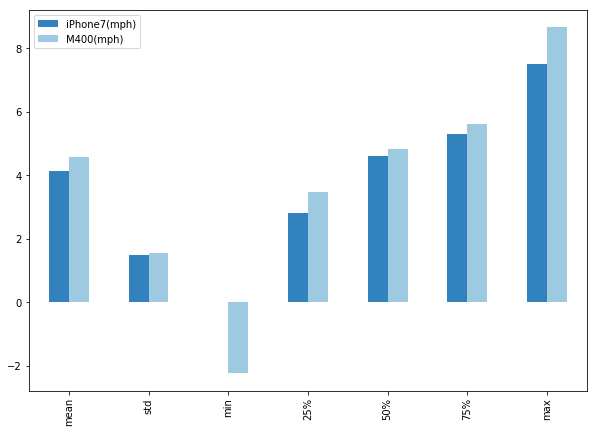

In [39]:
colors = plt.cm.tab20c(np.linspace(0, 1, 10))
ax1 = speed_noCount.plot(kind='bar', color=colors, figsize=(10, 7))
plt.show()

In [145]:
colors = plt.cm.tab20c(np.linspace(0, 1, 4))
speed_rawData = pd.concat([iphone7["mph"], m400["Speed(mph)"]], axis=1)
speed_rawData.columns = ['iPhone7(mph)', 'M400(mph)']
speed_rawData.head()

,iPhone7(mph),M400(mph)
0,0.0,-2.2369
1,1.0,-2.2369
2,1.7,-2.2369
3,1.8,1.0737
4,2.1,1.0737


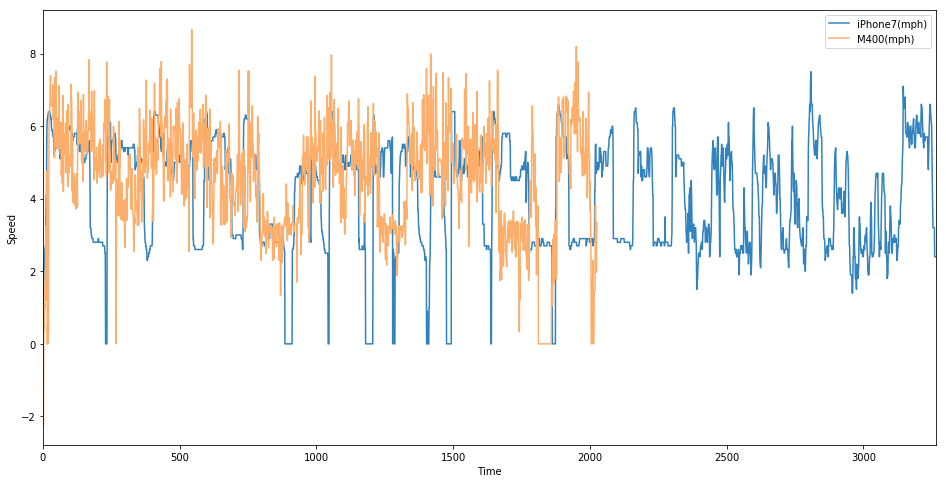

In [146]:
ax = speed_rawData.plot(table=False, figsize=(16,8), color=colors)
ax.set_xlabel("Time")
ax.set_ylabel("Speed")
plt.show()

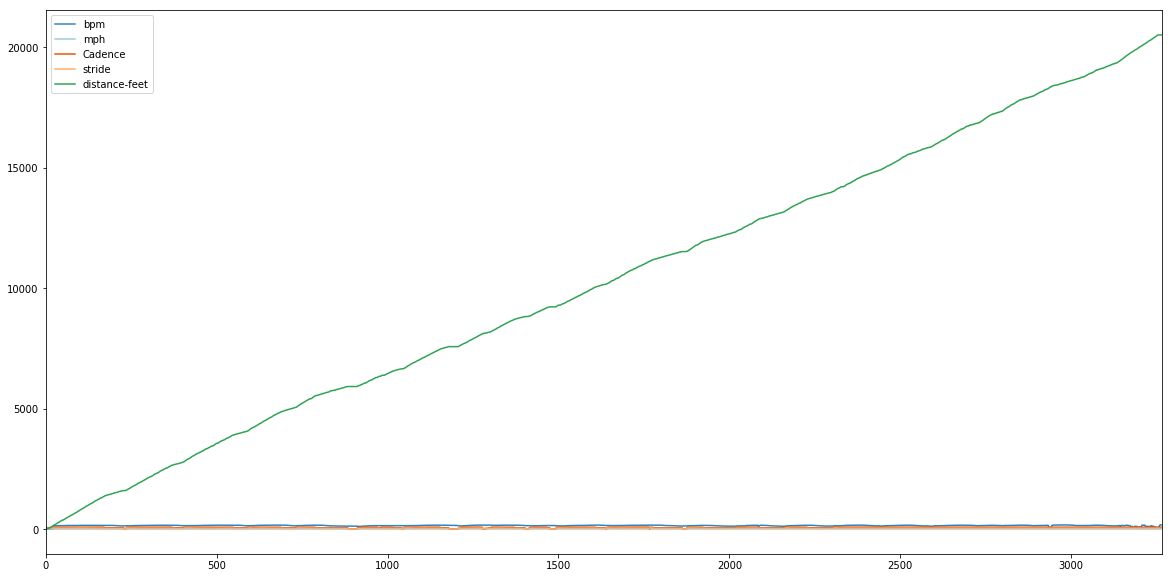

In [42]:
ax = iphone7.plot(table=False, figsize=(20,10), color=colors)

In [51]:
i7_noDist = iphone7.drop(["distance-feet"], axis=1)
i7_noDist.head()

,Time,bpm,mph,pace,Cadence,stride
0,0:00:00,0,0.0,0:00,0,0
1,0:00:01,0,1.0,62:02:00,53,34
2,0:00:02,0,1.7,36:08:00,52,33
3,0:00:03,0,1.8,32:48:00,49,33
4,0:00:04,0,2.1,29:05:00,50,26


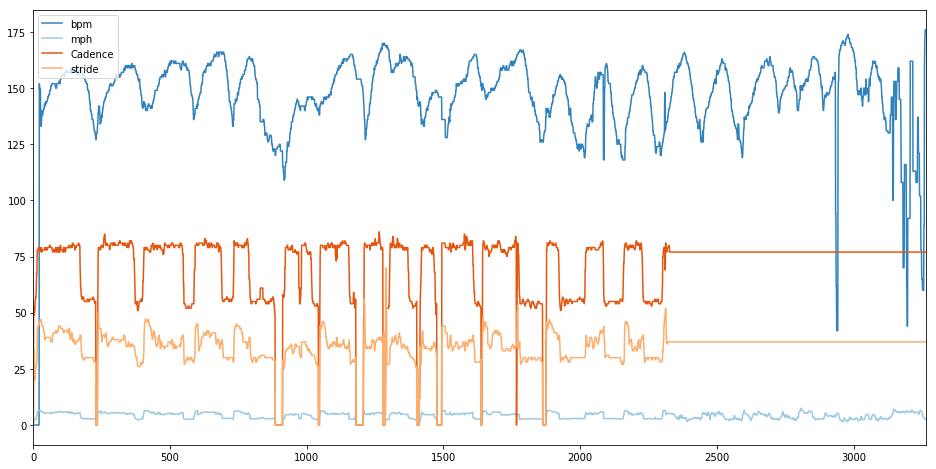

In [55]:
ax = i7_noDist.plot(table=False, figsize=(16,8), color=colors)
plt.show()

In [140]:
from datetime import datetime

In [142]:
second = pd.Series(pd.to_timedelta(new_m400['Time']))
second = second.dt.total_seconds()
second.head()

0    62947.081
1    62948.085
2    62949.087
3    62950.261
4    62951.118
Name: Time, dtype: float64

In [127]:
new_m400["Seconds"] = second.apply(lambda row: row - second.iloc[[0]].values[0])
new_m400

,Timestamp,Speed(mph),Lat,Long,Alt(feet),ActivityType,ActivityConfidence,Pressure(kilopascals),Date,Time,Seconds
0,01-Nov-2017 17:29:07.081,-2.2369,40.110340,-88.230768,742.826599,Unknown,High,0.0000,01-Nov-2017,17:29:07.081,0.000
1,01-Nov-2017 17:29:08.085,-2.2369,40.110338,-88.230769,742.796936,Unknown,High,98.5490,01-Nov-2017,17:29:08.085,1.004
2,01-Nov-2017 17:29:09.087,-2.2369,40.110338,-88.230769,742.796936,Unknown,High,98.5505,01-Nov-2017,17:29:09.087,2.006
3,01-Nov-2017 17:29:10.261,1.0737,40.110249,-88.230679,621.126709,Unknown,High,98.5520,01-Nov-2017,17:29:10.261,3.180
4,01-Nov-2017 17:29:11.118,1.0737,40.110131,-88.230655,781.227051,Unknown,High,98.5540,01-Nov-2017,17:29:11.118,4.037
5,01-Nov-2017 17:29:12.107,0.3803,40.110245,-88.230726,766.409424,Unknown,High,98.5612,01-Nov-2017,17:29:12.107,5.026
6,01-Nov-2017 17:29:13.098,1.0961,40.110230,-88.230894,736.260681,Unknown,High,98.5615,01-Nov-2017,17:29:13.098,6.017
7,01-Nov-2017 17:29:14.100,0.9619,40.110223,-88.230876,738.750793,Unknown,High,98.5625,01-Nov-2017,17:29:14.100,7.019
8,01-Nov-2017 17:29:15.101,1.7224,40.110216,-88.230840,740.927856,Unknown,High,98.5633,01-Nov-2017,17:29:15.101,8.020
9,01-Nov-2017 17:29:16.104,1.7224,40.110166,-88.230837,746.903809,Unknown,High,98.5630,01-Nov-2017,17:29:16.104,9.023


In [124]:
second_i7 = pd.Series(pd.to_timedelta(iphone7['Time']))
second_i7 = second_i7.dt.total_seconds()
second_i7.head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: Time, dtype: float64

In [126]:
iphone7["Seconds"] = second_i7.apply(lambda row: row - second_i7.iloc[[0]].values[0])
iphone7

,Time,bpm,mph,pace,Cadence,stride,distance-feet,Seconds
0,0:00:00,0,0.0,0:00,0,0,0.00,0.0
1,0:00:01,0,1.0,62:02:00,53,34,4.54,1.0
2,0:00:02,0,1.7,36:08:00,52,33,7.87,2.0
3,0:00:03,0,1.8,32:48:00,49,33,11.80,3.0
4,0:00:04,0,2.1,29:05:00,50,26,15.43,4.0
5,0:00:05,0,2.1,29:05:00,50,26,15.43,5.0
6,0:00:06,0,2.3,26:13:00,53,20,19.66,6.0
7,0:00:07,0,2.6,23:16,56,24,28.74,7.0
8,0:00:08,0,2.6,23:16,56,24,28.74,8.0
9,0:00:09,0,2.7,21:50,57,26,37.82,9.0
